In [1]:
library('MTS')

In [3]:
xt = matrix(rnorm(150), 50, 3)

[1] "Covariance matrix:"
        [,1]    [,2]    [,3]
[1,]  0.9585 -0.0988 -0.0130
[2,] -0.0988  1.0141  0.0608
[3,] -0.0130  0.0608  1.0843
CCM at lag:  0 
        [,1]   [,2]    [,3]
[1,]  1.0000 -0.100 -0.0128
[2,] -0.1002  1.000  0.0580
[3,] -0.0128  0.058  1.0000
Simplified matrix: 
CCM at lag:  1 
. . . 
. . . 
. . . 
CCM at lag:  2 
- . . 
. - . 
. . . 
CCM at lag:  3 
. . . 
. . . 
. . . 
CCM at lag:  4 
. . . 
. . . 
. . . 
CCM at lag:  5 
. . . 
. . . 
. . . 
CCM at lag:  6 
. . . 
. . . 
. . . 
CCM at lag:  7 
. . . 
. . . 
. . . 
CCM at lag:  8 
. . . 
. . . 
. . . 
CCM at lag:  9 
. . . 
. . . 
. . . 
CCM at lag:  10 
. . . 
. . . 
. . . 
CCM at lag:  11 
. - . 
. . . 
. . . 
CCM at lag:  12 
. . . 
. . . 
. . . 

Hit Enter for p-value plot of individual ccm:  


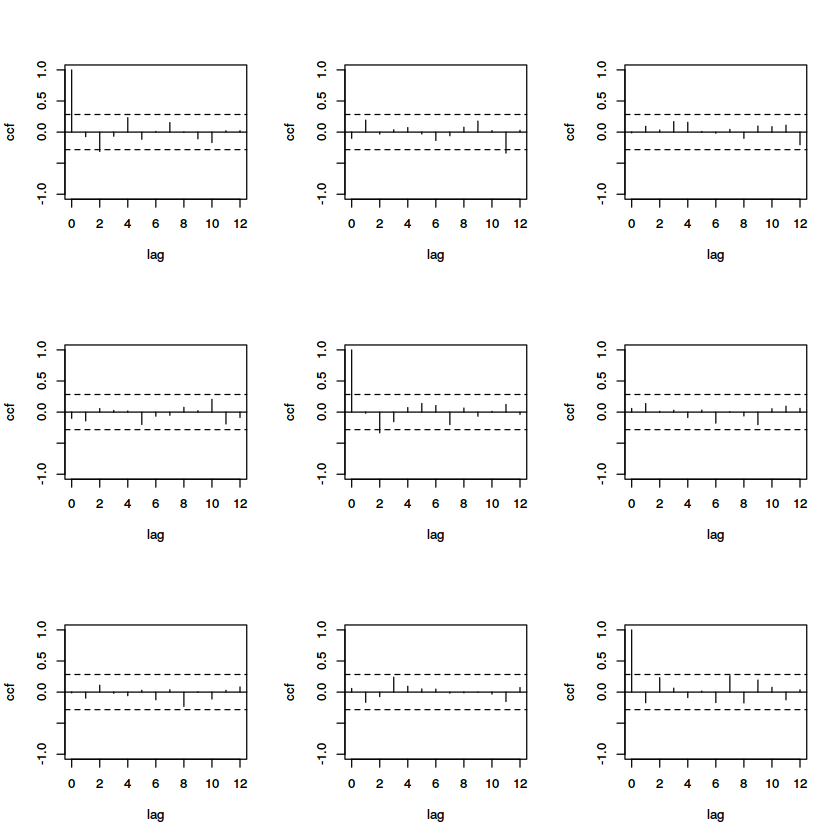

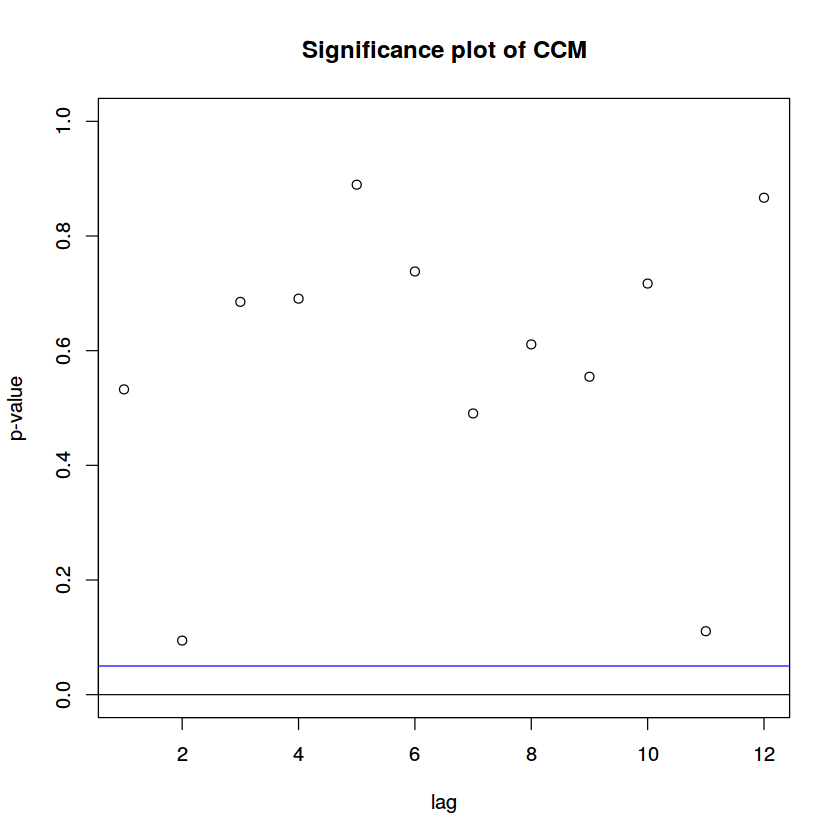

In [6]:
a = ccm(xt)

In [7]:
a$pvalue

[1] 0.5324886 0.0943461 0.6851299 0.6906942 0.8895013 0.7381186 0.4905028
 [8] 0.6109452 0.5545606 0.7170312 0.1106987 0.8667271

# Procedure for statistical analysis of trajectories

1. use the package `MTS` from R to compute the p-values across the `x` and `y` aggregated trajectories. Use a p-value of 1 for trajectories for which there are no observed correlations. This is using the Ljung-Box statistic.
2. Aggregate the p-values using Fisher's method:
`pchisq(-2*sum(log(p-balues)), df, lower.tail=FALSE)` where `df=2*length(p-values)`

In [2]:
library('ggplot2')
library('dplyr')
library('tidyr')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
trajectories <- read.csv("../data/trajectory_df.csv", header = TRUE)

In [4]:

trajectories$pair_id <- as.factor(trajectories$pair_id)
trajectories$channe <- as.factor(trajectories$channel)

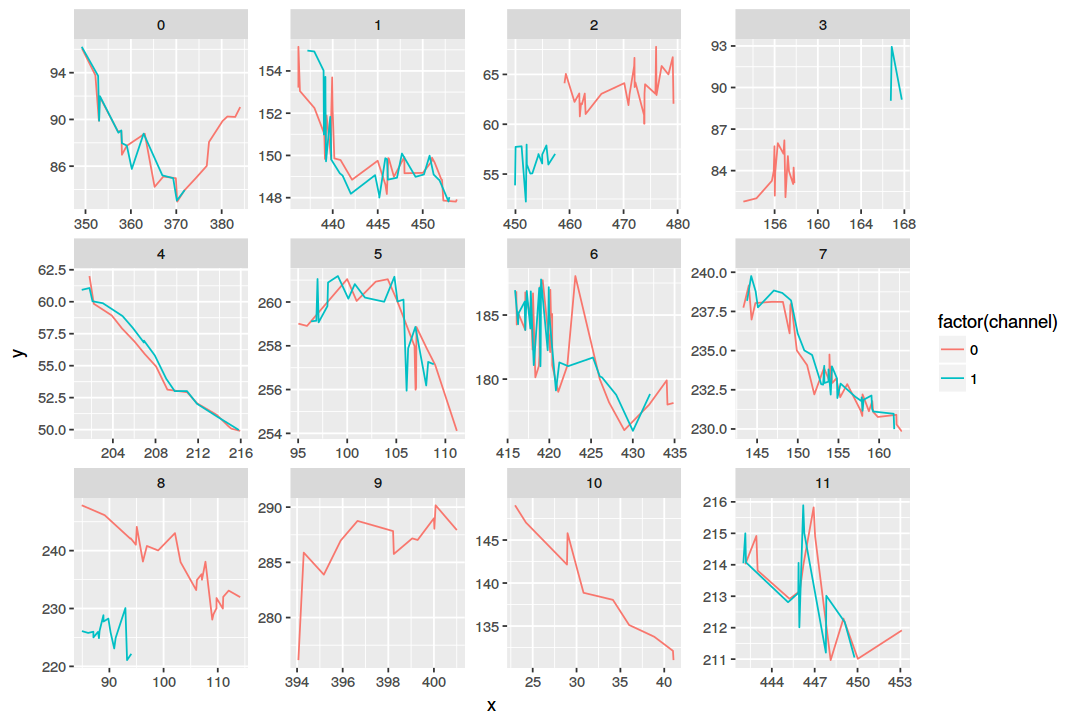

In [5]:
options(repr.plot.width = 9, repr.plot.height = 6)
p <- ggplot(data = filter(trajectories, filename == 'with glucose 2'), 
                aes(x = x, y = y, color = factor(channel))) + geom_line() + 
                facet_wrap(~pair_id, scale = "free")
p

## Helper Function definitions

In [40]:
# this returns the p values given a data frame with several trajectories
trajectory_p_vals <- function(df) {
    p_vals <- 0
    i <- 1
     for (pair in unique(df$pair_id)) {
        print(pair)
        this_df <- df %>% filter(pair_id == pair)
         
         p_vals[i] <- single_trajectory_p_val(df, x)
         i <- i+1
         p_vals[i] <- single_trajectory_p_val(df, y)
         i <- i+1
     }

    p_vals
}

single_trajectory_p_val <- function(df, coord) {
    ispresent <- df %>% select(coord, channel, frame)

    if(length(unique(ispresent$channel))> 1) {
        res <- ispresent %>% 
         spread(channel, coord) %>%
         select(2:3) %>%
         na.omit() %>%
         ccm(output = FALSE, lags =1)
        p_val <- res$pvalue[1]
    } else {
        p_val <- 1
    }
   p_val 
}
    
# this take a vector of p values and aggregates it using Fisher's method
aggregate_pvals <- function(p_vals) {
    n_df <- 2* length(p_vals)
    pchisq(-2*sum(log(p_vals)), n_df, lower.tail=FALSE) 
}

### Running the analysis

In [41]:
fn

[1] "with glucose with 20X objective"

In [43]:
df = filter(trajectories, filename == fn)

In [44]:
df2 = filter(df, pair_id == 43)

In [47]:
single_trajectory_p_val(df2, y)

ERROR: Error in eval(expr, envir, enclos): object 'y' not found


In [36]:
for (fn in unique(trajectories$filename)) {
    df = filter(trajectories, filename == fn)
    print(fn)
    print(aggregate_pvals(trajectory_p_vals(df)))
}


[1] "with glucose 4 but have flow"
[1] "0"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "6"
[1] "7"
[1] "8"
[1] "9"
[1] "10"
[1] "11"
[1] "12"
[1] "13"
[1] "14"
[1] "15"
[1] "16"
[1] "17"
[1] "18"
[1] "19"
[1] 0
[1] "with glucose with 20X objective"
[1] "0"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "6"
[1] "7"
[1] "8"
[1] "9"
[1] "10"
[1] "11"
[1] "12"
[1] "13"
[1] "14"
[1] "15"
[1] "16"
[1] "17"
[1] "18"
[1] "19"
[1] "20"
[1] "21"
[1] "22"
[1] "23"
[1] "24"
[1] "25"
[1] "26"
[1] "27"
[1] "28"
[1] "29"
[1] "30"
[1] "31"
[1] "32"
[1] "33"
[1] "34"
[1] "35"
[1] "36"
[1] "37"
[1] "38"
[1] "39"
[1] "40"
[1] "41"
[1] "42"
[1] "43"


ERROR: Error in y[(j + 1):nT, ]: subscript out of bounds


In [28]:
hi <- aggregate_pvals(p_vals)

In [29]:
aggregate_pvals(c(p_vals, p_vals))

[1] 9.082296e-33

In [30]:
aggregate_pvals(c(hi, hi))

[1] 2.827335e-32